# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as p
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/forecast?id=524901&appid={weather_api_key}"
#url = f"http://api.openweathermap.org/geo/1.0/direct?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    #if (i > 5): break

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #p.pprint(city_weather) # debug

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']
        #print(city_lat)
        city_lng = city_weather['city']['coord']['lon']
        #print(city_lng)
        city_max_temp = city_weather['list'][0]['main']['temp_max']
        #print(city_max_temp)
        city_humidity = city_weather['list'][0]['main']['humidity']
        #print(city_humidity)
        city_clouds = city_weather['list'][0]['clouds']['all']
        #print(city_clouds)
        city_wind = city_weather['list'][0]['wind']['speed']
        #print(city_wind)
        city_country = city_weather['city']['country']
        #print(city_country)
        city_date = city_weather['list'][0]['dt_txt']
        #print(city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        #p.pprint(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | puntarenas
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | thompson
Processing Record 12 of Set 1 | kutum
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | kirovskoye
Processing Record 16 of Set 1 | mossel bay
Processing Record 17 of Set 1 | kudymkar
Processing Record 18 of Set 1 | jinka
Processing Record 19 of Set 1 | kirakira
Processing Record 20 of Set 1 | vorgashor
Processing Record 21 of Set 1 | aykhal
Processing Record 22 of Set 1 | guerrero negro
Processing Reco

Processing Record 39 of Set 4 | belmar
Processing Record 40 of Set 4 | hamilton
Processing Record 41 of Set 4 | sunne
Processing Record 42 of Set 4 | castillos
Processing Record 43 of Set 4 | eldorado
Processing Record 44 of Set 4 | flying fish cove
Processing Record 45 of Set 4 | serenje
Processing Record 46 of Set 4 | afaahiti
Processing Record 47 of Set 4 | centerville
Processing Record 48 of Set 4 | boguchany
Processing Record 49 of Set 4 | slavyanka
Processing Record 0 of Set 5 | fort bragg
Processing Record 1 of Set 5 | lamu
Processing Record 2 of Set 5 | aasiaat
Processing Record 3 of Set 5 | juneau
Processing Record 4 of Set 5 | mil'kovo
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | nizhneangarsk
Processing Record 7 of Set 5 | ambovombe
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | hirado
Processing Record 10 of Set 5 | villaquilambre
Processing Record 11 of Set 5 | thunder bay
Processing Record 12 of Set 5 | briancon
Pro

Processing Record 32 of Set 8 | nar'yan-mar
Processing Record 33 of Set 8 | vargem grande do sul
Processing Record 34 of Set 8 | zhangatas
Processing Record 35 of Set 8 | la quiaca
Processing Record 36 of Set 8 | sefrou
Processing Record 37 of Set 8 | yushu
Processing Record 38 of Set 8 | hadibu
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | komsomol'skiy
Processing Record 41 of Set 8 | lautoka
Processing Record 42 of Set 8 | kalmunai
Processing Record 43 of Set 8 | tazacorte
Processing Record 44 of Set 8 | beyneu
Processing Record 45 of Set 8 | alotau
City not found. Skipping...
Processing Record 46 of Set 8 | anadyr
Processing Record 47 of Set 8 | yuzhno-kurilsk
Processing Record 48 of Set 8 | mangrol
Processing Record 49 of Set 8 | north bend
Processing Record 0 of Set 9 | jackson
Processing Record 1 of Set 9 | igabi
Processing Record 2 of Set 9 | vingt cinq
City not found. Skipping...
Processing Record 3 of Set 9 | rosignano solvay-castiglioncello
City not f

Processing Record 24 of Set 12 | ubari
Processing Record 25 of Set 12 | yen vinh
Processing Record 26 of Set 12 | i-n-salah
Processing Record 27 of Set 12 | motygino
Processing Record 28 of Set 12 | greymouth
Processing Record 29 of Set 12 | praia
Processing Record 30 of Set 12 | khonsa
Processing Record 31 of Set 12 | robertsport
Processing Record 32 of Set 12 | kataragama
City not found. Skipping...
Processing Record 33 of Set 12 | siwa oasis
Processing Record 34 of Set 12 | axim
Processing Record 35 of Set 12 | ariquemes
Processing Record 36 of Set 12 | marshfield
Processing Record 37 of Set 12 | badiyah
Processing Record 38 of Set 12 | kulia village
City not found. Skipping...
Processing Record 39 of Set 12 | larreynaga
Processing Record 40 of Set 12 | wagar
Processing Record 41 of Set 12 | lib
Processing Record 42 of Set 12 | kasane
Processing Record 43 of Set 12 | mandera
Processing Record 44 of Set 12 | tantou
Processing Record 45 of Set 12 | katsuren-haebaru
Processing Record 4

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df['Date'] = city_data_df['Date'].str.split(' ').str[0]
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,297.79,76,80,2.30,PN,2023-04-19
1,kodiak,57.7900,-152.4072,278.88,56,75,2.18,US,2023-04-19
2,ribeira grande,38.5167,-28.7000,287.44,67,40,10.91,PT,2023-04-19
3,puntarenas,9.9763,-84.8384,305.76,51,43,5.10,CR,2023-04-19
4,port-aux-francais,-49.3500,70.2167,277.98,67,39,15.85,TF,2023-04-19


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,297.79,76,80,2.30,PN,2023-04-19
1,kodiak,57.7900,-152.4072,278.88,56,75,2.18,US,2023-04-19
2,ribeira grande,38.5167,-28.7000,287.44,67,40,10.91,PT,2023-04-19
3,puntarenas,9.9763,-84.8384,305.76,51,43,5.10,CR,2023-04-19
4,port-aux-francais,-49.3500,70.2167,277.98,67,39,15.85,TF,2023-04-19


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

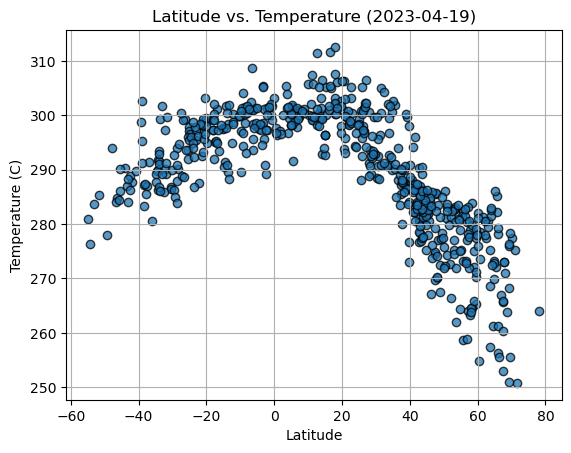

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Temperature ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

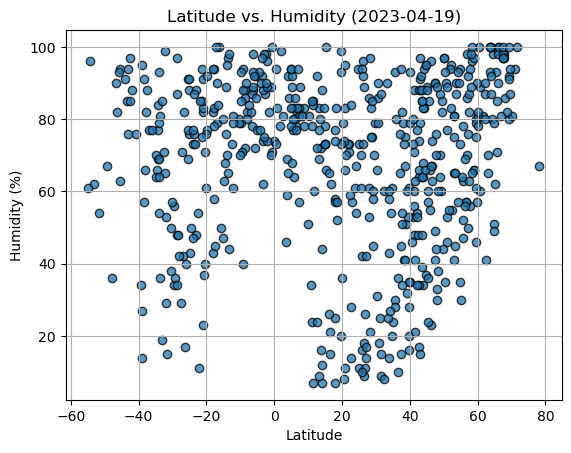

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Humidity ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

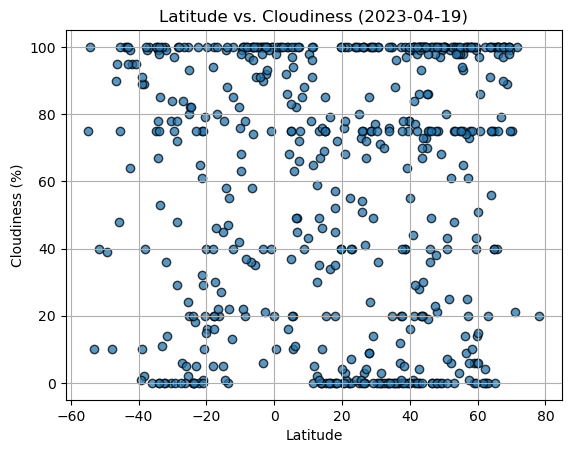

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Cloudiness ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

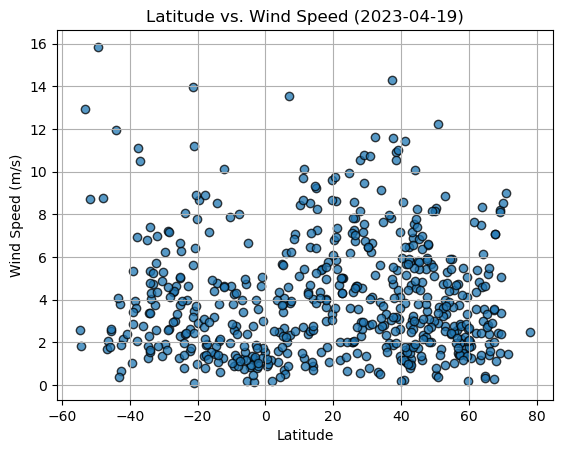

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Latitude vs. Wind Speed ({city_data_df["Date"].iloc[0]})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_reg(x, y, title, x_label, y_label):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regression_line = slope * x + intercept

    # Create scatter plot
    plt.scatter(x, y, marker='o', edgecolors='black', alpha=0.75)
    plt.plot(x, regression_line, color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,278.88,56,75,2.18,US,2023-04-19
2,ribeira grande,38.5167,-28.7000,287.44,67,40,10.91,PT,2023-04-19
3,puntarenas,9.9763,-84.8384,305.76,51,43,5.10,CR,2023-04-19
5,wailua homesteads,22.0669,-159.3780,298.37,71,0,2.03,US,2023-04-19
6,college,64.8569,-147.8028,273.22,51,75,0.41,US,2023-04-19


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,297.79,76,80,2.30,PN,2023-04-19
4,port-aux-francais,-49.3500,70.2167,277.98,67,39,15.85,TF,2023-04-19
8,hermanus,-34.4187,19.2345,289.97,69,99,3.38,ZA,2023-04-19
9,invercargill,-46.4000,168.3500,284.83,82,95,2.06,NZ,2023-04-19
15,mossel bay,-34.1831,22.1460,291.78,77,78,2.32,ZA,2023-04-19


###  Temperature vs. Latitude Linear Regression Plot

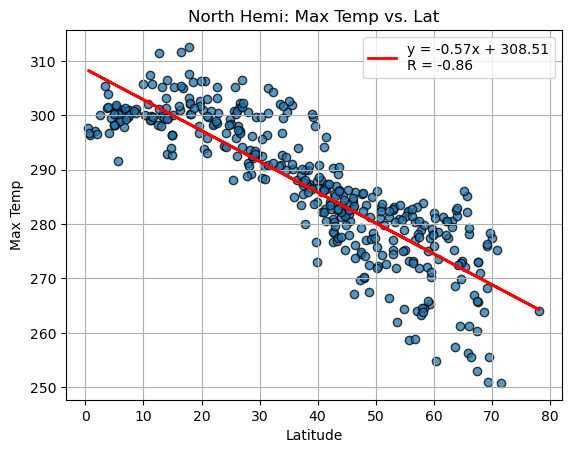

In [15]:
# Linear regression on Northern Hemisphere: Temperature vs. Latitude
create_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'North Hemi: Max Temp vs. Lat', 'Latitude', 'Max Temp')

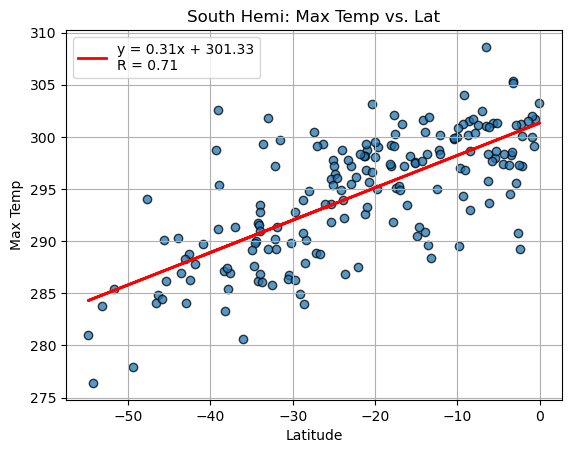

In [16]:
# Linear regression on Southern Hemisphere: Temperature vs. Latitude
create_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'South Hemi: Max Temp vs. Lat', 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** In the northern hemisphere, there is a negative linear relationship between latitude and max temperature, with temperatures decreasing as latitude increases. In the southern hemisphere, there is a positive linear relationship, with temperatures increasing as latitude increases. The strength of the relationship is stronger in the northern hemisphere (R = -0.87) compared to the southern hemisphere (R = 0.73).

### Humidity vs. Latitude Linear Regression Plot

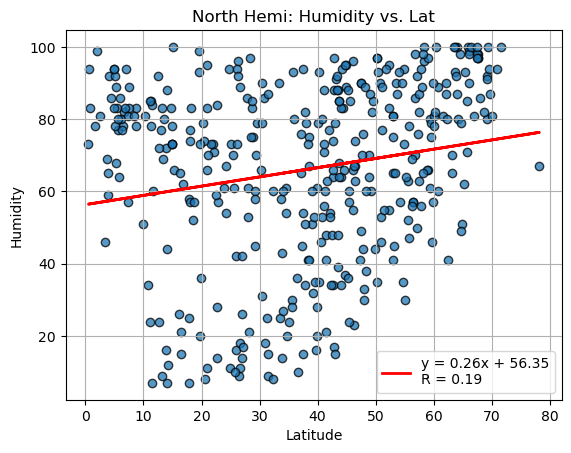

In [17]:
# Northern Hemisphere
create_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'North Hemi: Humidity vs. Lat', 'Latitude', 'Humidity')

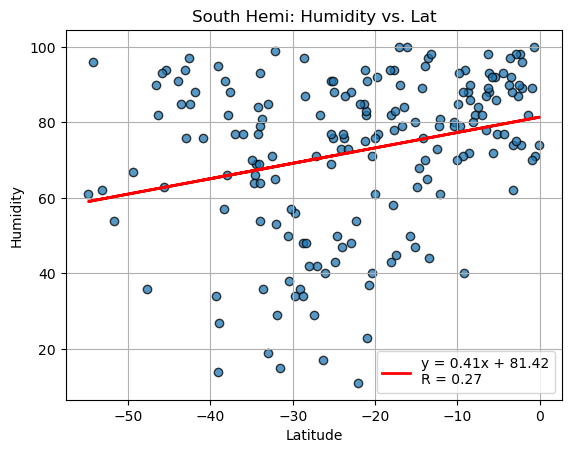

In [18]:
# Southern Hemisphere
create_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'South Hemi: Humidity vs. Lat', 'Latitude', 'Humidity')

**Discussion about the linear relationship:** There is a weak positive linear relationship between latitude and humidity in both the northern and southern hemispheres. The strength of the relationship is slightly stronger in the southern hemisphere (R = 0.21) compared to the northern hemisphere (R = 0.18).

### Cloudiness vs. Latitude Linear Regression Plot

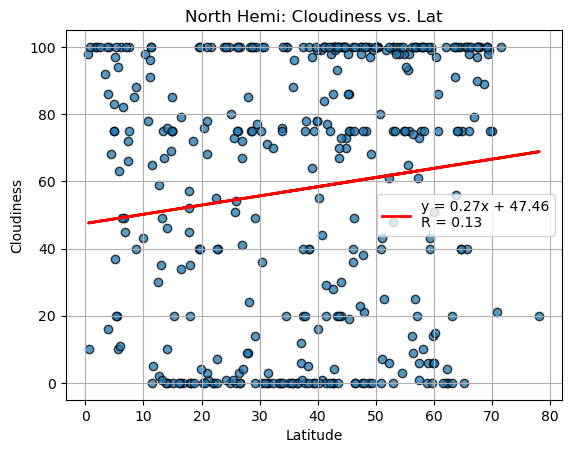

In [19]:
# Northern Hemisphere
create_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'North Hemi: Cloudiness vs. Lat', 'Latitude', 'Cloudiness')

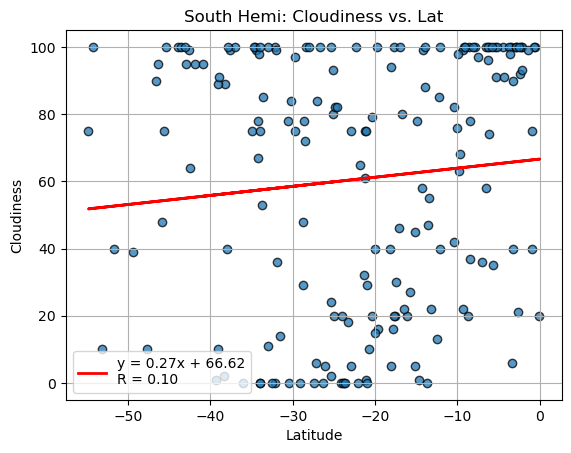

In [20]:
# Southern Hemisphere
create_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'South Hemi: Cloudiness vs. Lat', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** There is a weak positive linear relationship between latitude and cloudiness in the northern hemisphere, with cloudiness slightly increasing as latitude increases. In the southern hemisphere, there is a weak negative linear relationship, with cloudiness slightly decreasing as latitude increases. The strength of the relationship is slightly stronger in the northern hemisphere (R = 0.20) compared to the southern hemisphere (R = -0.01).

### Wind Speed vs. Latitude Linear Regression Plot

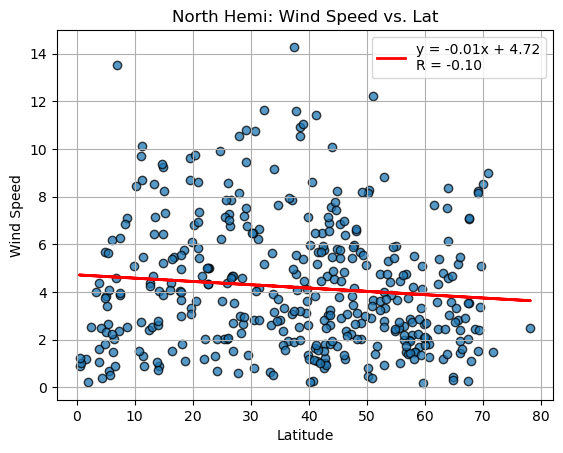

In [21]:
# Northern Hemisphere
create_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'North Hemi: Wind Speed vs. Lat', 'Latitude', 'Wind Speed')

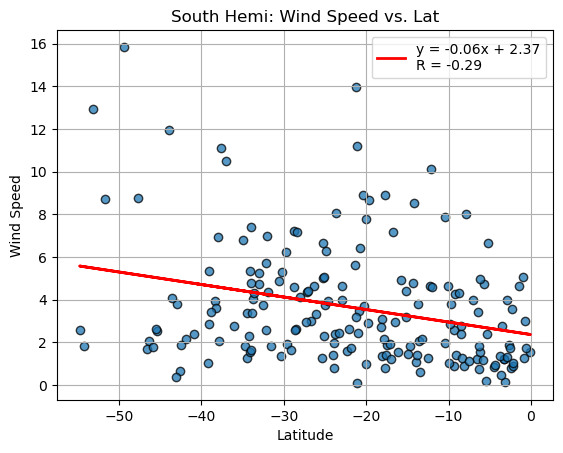

In [22]:
# Southern Hemisphere
create_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'South Hemi: Wind Speed vs. Lat', 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** There is a very weak negative linear relationship between latitude and wind speed in both the northern and southern hemispheres, with wind speed decreasing slightly as latitude increases. The strength of the relationship is very weak in both hemispheres, with R-values close to zero (-0.01 in northern hemisphere and -0.29 in southern hemisphere).